In [3]:
# Code source: Gael Varoqueux
# Modified for Documentation merge by Jaques Grobler
# License: BSD 3 clause

#### Iris Flower Dataset ####

import numpy as np
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [4]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

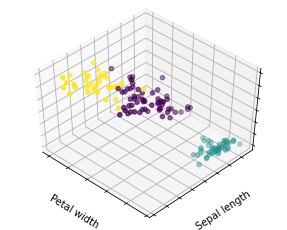

In [5]:
est = KMeans(n_clusters=3)

fig = pl.figure(figsize=(4, 3))
fig.suptitle('k=3', fontsize=14)

pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

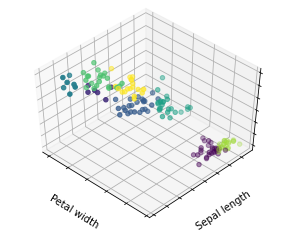

In [6]:
est = KMeans(n_clusters=8)

fig = pl.figure(figsize=(4, 3))
fig.suptitle('k=8', fontsize=14)

pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

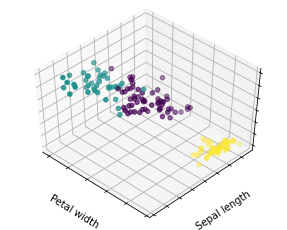

In [7]:
est = KMeans(n_clusters=3, n_init=1, init='random') # bad init

fig = pl.figure(figsize=(4, 3))
fig.suptitle('Random Initialization (k=3)', fontsize=14)

pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

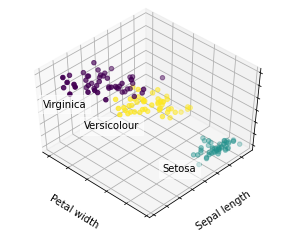

In [8]:
# Plot the ground truth
fig = pl.figure(figsize=(4, 3))
pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

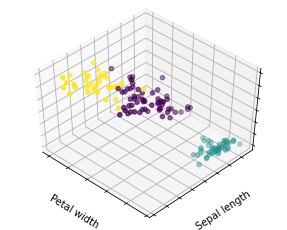

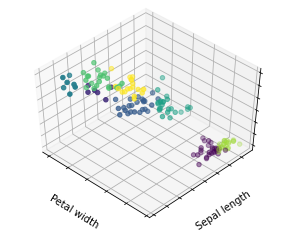

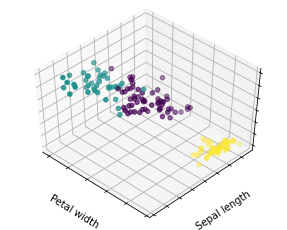

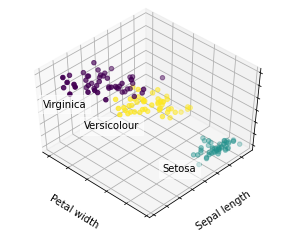

In [12]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = pl.figure(fignum, figsize=(4, 3))
    pl.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    pl.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = pl.figure(fignum, figsize=(4, 3))
pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

In [13]:
#### Digits Dataset ####

import numpy as np
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn import datasets
from sklearn.decomposition import RandomizedPCA
from matplotlib import pyplot as plt
from matplotlib import cm

##### data #####
# load digits dataset
data = datasets.load_digits()
t = data['target']

# perform PCA dimensionality reduction
pca = RandomizedPCA(n_components=2).fit(data['data'])
X = pca.transform(data['data'])

##### cluster data into k=1..20 clusters #####
K_MAX = 20
KK = range(1,K_MAX+1)

KM = [kmeans(X,k) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss          # The between-cluster sum of squares

ImportError: cannot import name 'RandomizedPCA' from 'sklearn.decomposition' (c:\users\obero\anaconda3\envs\chatbot\lib\site-packages\sklearn\decomposition\__init__.py)

In [11]:
##### plots #####
kIdx = 9        # k=10
clr = cm.spectral( np.linspace(0,1,10) ).tolist()

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Variance Explained (%)')
plt.title('Elbow for k-Means Clustering')

NameError: name 'cm' is not defined

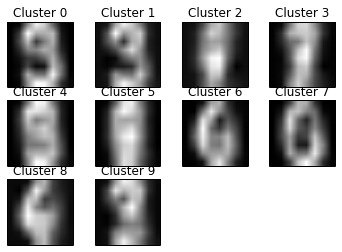

In [10]:
# show centroids for k=10 clusters
plt.figure()
for i in range(kIdx+1):
    img = pca.inverse_transform(centroids[kIdx][i]).reshape(8,8)
    ax = plt.subplot(3,4,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap=cm.gray)
    plt.title( 'Cluster %d' % i )

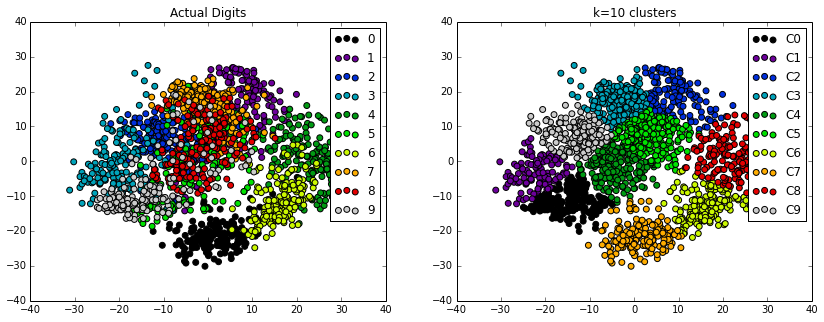

In [11]:
# compare k=10 clustering vs. actual digits (PCA projections)
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121)
for i in range(10):
    ind = (t==i)
    ax.scatter(X[ind,0],X[ind,1], s=35, c=clr[i], label='%d'%i)
plt.legend()
plt.title('Actual Digits')
ax = fig.add_subplot(122)
for i in range(kIdx+1):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,0],X[ind,1], s=35, c=clr[i], label='C%d'%i)
plt.legend()
plt.title('k=%d clusters'%KK[kIdx])

plt.show()